In [14]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [15]:
def showImagesMatrix(list_of_files,hSize, wSize,col=10):
    fig = figure( figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = number_of_files/col
    if (number_of_files%col != 0):
        row += 1
    for i in range(number_of_files):
        a=fig.add_subplot(row,col,i+1)
        image = imread(mypath+'/'+list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

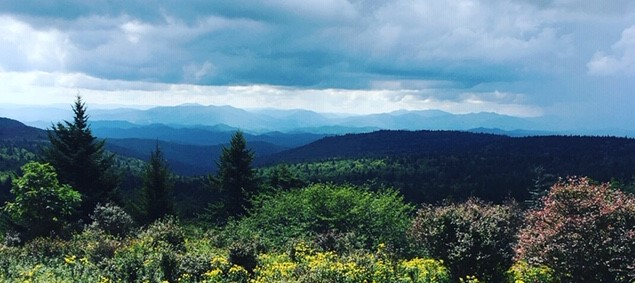

In [7]:
from IPython.display import Image
PATH = "E:/FS_meeting/FiguresMisc/"
Image(filename = PATH + "Apps_Long.jpg", width=1000, height=1000)

Most of the nitrogen, carbon and lignin parameters were started from existing papers, and supplemented with the TRY database. The file NECN_Folder contains the data taken from each paper and the database. Each Try is linked to an individual paper in the try files. Some species were adapted from existing papers where the formula was assumed to have a carbon ratio of 1/2. This formula is therefore C: N=.5 /(g nitrogen/g total). For species that were not included in either papers nor the plant database were researched individually, or given a value based on a genus/family/order similarity to a species in this or another Landis papers. Try data was queried by Species and by trait.    
<ul>
<li>I started with values from previous LANDIS-II models and supplmented them with data from the TRY. </li>
<li>This data was also supplemnted with a 2009 Davis paper.</li>
<li>In the event of multiple returns values were meaned.</li>
<li>Values that were still missing were assesed as similar through genus then through genus then family and in a couple cases case order. </li>
</ul>

The final metadata and choices can be found in the CleandupNECNdocumentation.csv file

In [ ]:
PATH = "E:/FS_meeting/FiguresMisc/"
Image(filename = PATH + "Davis2009.PNG", width=1000, height=1000)

 <h2> GGDmin,GDDmax,Frost,D3,FRT</h2>
These values were taken from the original linkages manual which can be found at https://daac.ornl.gov/daacdata/model_archive/LINKAGES/comp/ORNL_TM-9519.pdf. Other values were taken from existing LANDIS papers, these can be found in the NECN folder. Species that could not be found in either way were adapted from qualitative assessment of range in comparison to know values for other species. 

<h2> Functional Groups</h2>
To assess the functional groups I looked at the Ty Wilson maps for tree range and coupled them elevation levels, and 30yr normals for percipitation, temperature(min,mean,max), and vpd. These then used those to find the bounds of their range (maximum and minimum's of temp percip elevation, vpd). This was then used with a mean-shift algorthim to find the the closest groups based on mulitple criteria. Combinations were recombined to find groups. These groups were then plotted alongside two PCAs to display the grouping

I chose min ppt, min VPD, mean temp and mean elevation and ran a mean shift algorithm at different band widths until I found 3-4 groups. For the Conifers three groups fit well. For hardwoods there were a few species that fit no group. Because of how mean shift works expanding groups to include them collapsed too much of the difference between groups. In essence you can have 8 groups or 1 groups.  I assigned these to the group closest too them, ending with 4 groups. 
Conifers
<ul>
<li> Cold Conifers:Tsuga canadenesis, Pinus strobus</li>
<li>Hot Conifers: Pinus Virginia,Pinus taeda,Pinus rigida,Pinus Strobus, Piunus enchinata</li>
<li>Abies: Abies Fraseri</li>
</ul>
Hardwoods
<ul>
<li> LowTemp Low PPT: Betula alleghaniensis, Tilia americana (American Basswood), Acer Pensylvanicum,Prunus pennslyviana, Magnolia macrophylla</li>
<li>Halesia-Halesia diptera</li>
<li>Low temp Low VPD:(Nothern/Acer): Acer Rubrum,Acer saccharum ,Aesculus flava(Yellow buckeye),Amelanchier arborea,Fraxinus americana,Fraxinus pennsylvanica,Magnolia acuminata(cucumbertree,Prunus serotina,Quercus rubra,Qurecus prinus,Quercus veluntina</li>
<li>Highertemp Higher VPD (Hickory/Southern):Betula nigra(River birch),Carya codiformis (bitternut Hickory),Carya glabra (Pignut hickory),Carya ova,ta (shagbark hickory),Carya alba(mockernut hickory),Cornus florida,Ilex opaca (american Holly),Juglans nigra( Black walnut),Liquidamber styr,aciflua(sweetgum),Yellow Poplar,Nyssa sylvatice(blackgum),Oxydendrum arboreum,Quercus alba,Quercus coccinea,Quercus falcata,Quercus stellata(post oak)</li>    
<li>Outliers:Tilia americana var. heterophylla (white basswood) Magnolia macrophylla</li>  
</ul>

<h2>Biomass</h2>
In this script I am looking to gain parameters around which to start parameterizing the biomass and growth curves in the NECN file of LANDIS-II for the Southern Apps Project. Max biomass is a hypotheical maximum that a plot could hold if not in competetion. To find that I am going to use known values of biomass and project them beyond a likly maximum. 
This file is a continuation of the a sorter that went through each FIA plot for the states of North Carolina, Tennessee, South Carolina, and Georgia, and calculated the Basal area for the plot and each species within it. 

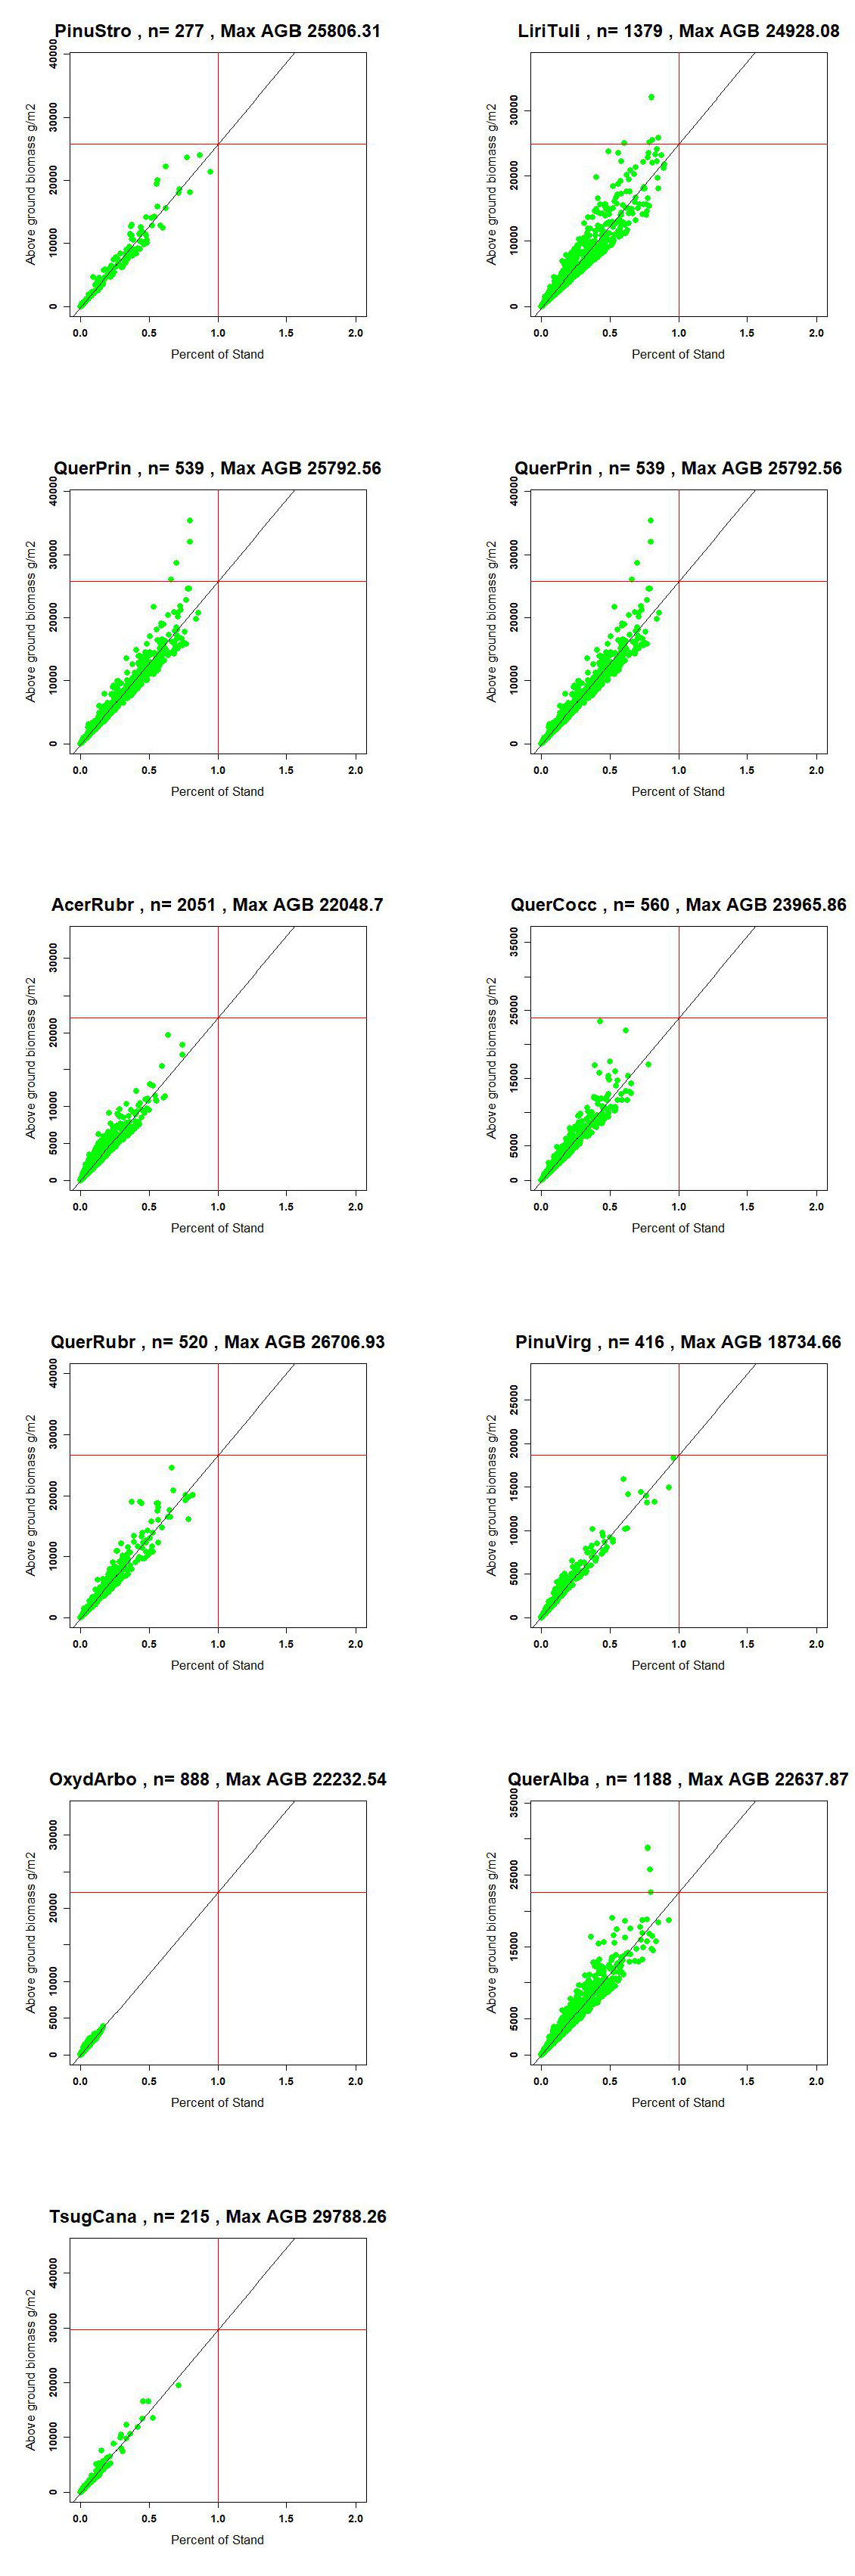

In [4]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

mypath='E:/Species Imput Files_1_3/Max_AGB'

hSize = 30
wSize = 50
col = 3

Important_Species=[129,621,832,316,806,833,132,711,802,261]

Growthcurveplot=["129_svp.jpeg","621_svp.jpeg","832_svp.jpeg","832_svp.jpeg","316_svp.jpeg","806_svp.jpeg","833_svp.jpeg",
                 "132_svp.jpeg","711_svp.jpeg","802_svp.jpeg","261_svp.jpeg",]

showImagesMatrix(Growthcurveplot, hSize = 62, wSize = 20,col=2)

<h2>Growth curves</h2>

Now that we have seen what some values for the maximum amount of Biomass we want to get a better idea for what the growth curves should look like so that we can calibarte the growth over time. To do this we use a "" associaation to look at the sight index and height to relate to age. Then we will look at the upper 20% of sites a fit a logarithmic regression to simulate the growht patterns of trees. This will be used as a basis for LANDIS-II Trials to tune the rate of growth.  

Here are graphs the 9 most prevelant species on the landscape. For each functional group we will use the two most prevalent species and find parameters that best align with the growth curve. 

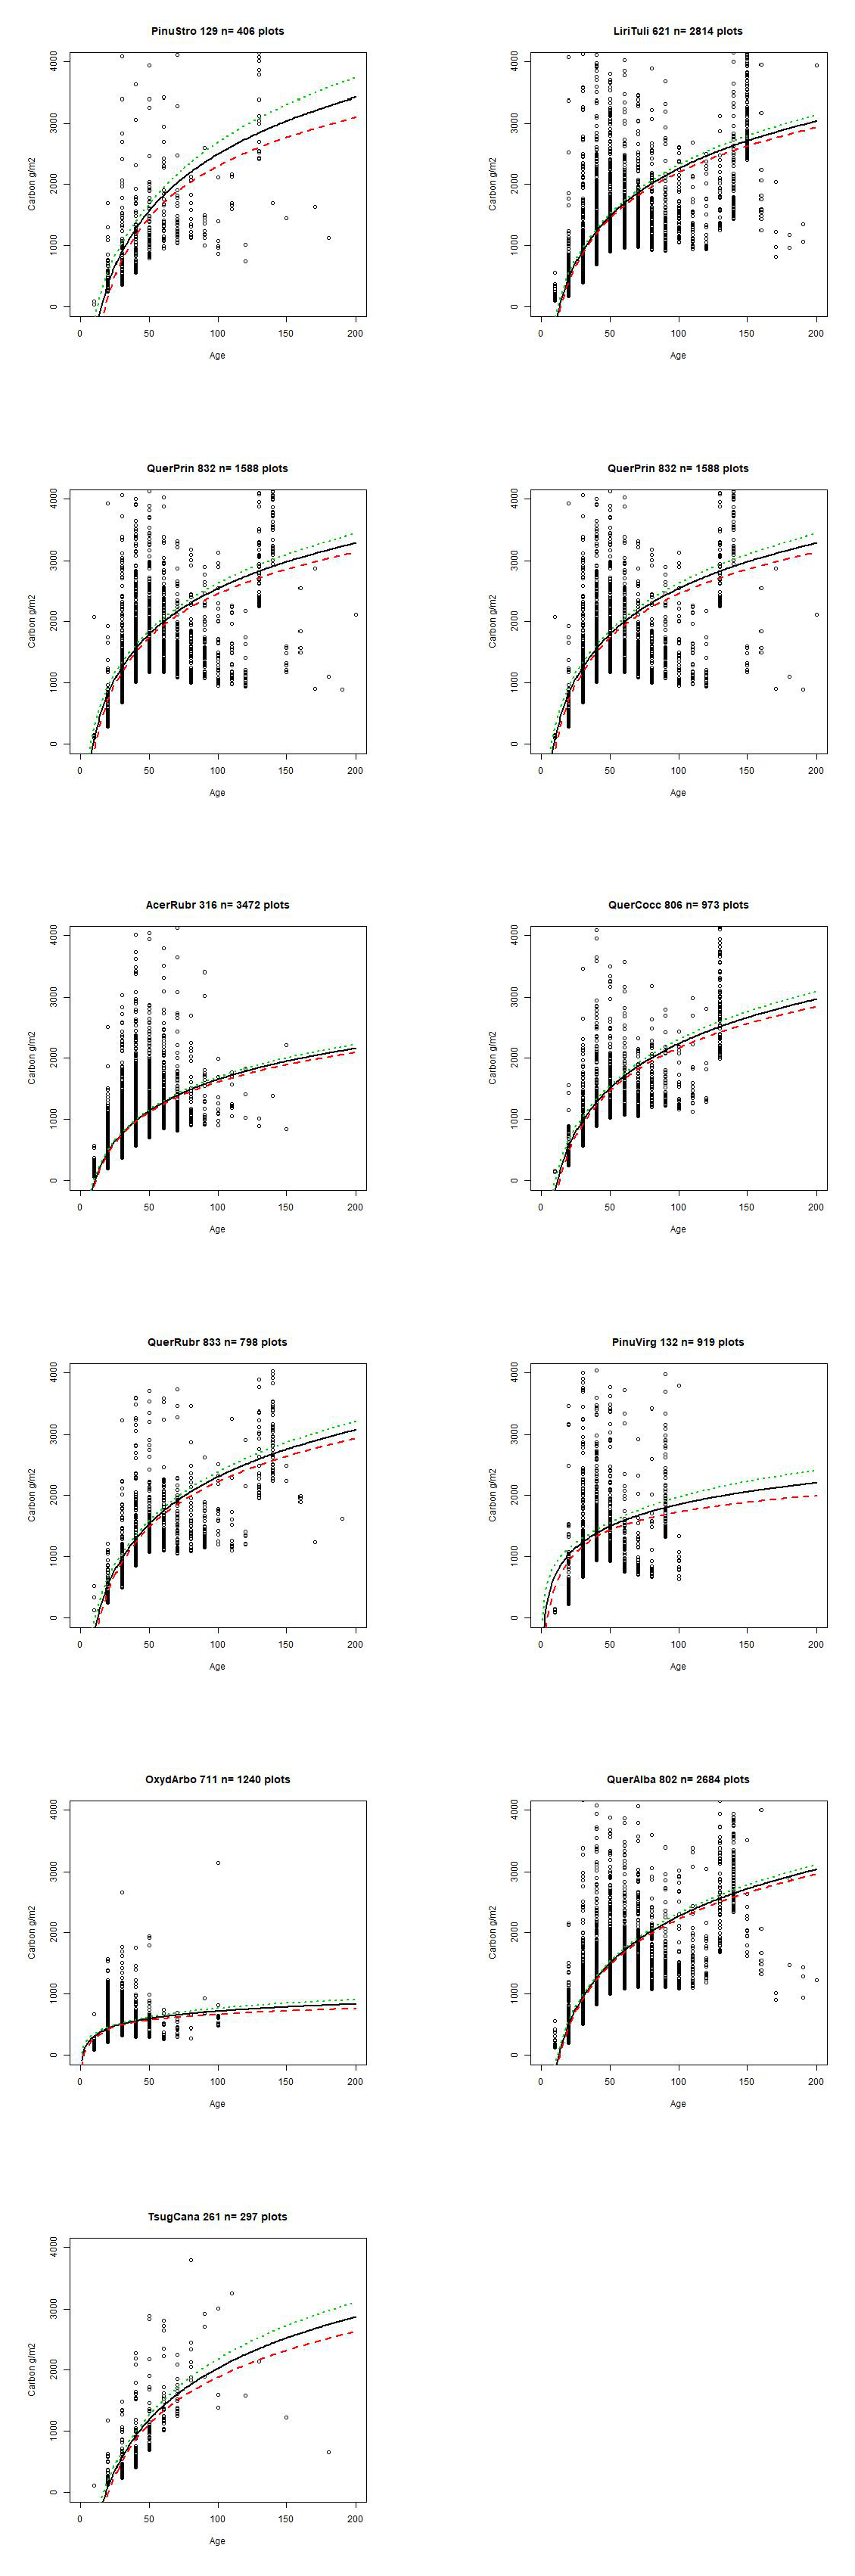

In [5]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

mypath='E:/Growth_cruves/Output'

hSize = 30
wSize = 50
col = 3

Important_Species=[129,621,832,316,806,833,132,711,802,261]

Growthcurveplot=["129_GY_Curve.jpeg","621_GY_Curve.jpeg","832_GY_Curve.jpeg","832_GY_Curve.jpeg","316_GY_Curve.jpeg","806_GY_Curve.jpeg","833_GY_Curve.jpeg","132_GY_Curve.jpeg",
                "711_GY_Curve.jpeg","802_GY_Curve.jpeg","261_GY_Curve.jpeg",]

showImagesMatrix(Growthcurveplot, hSize = 62, wSize = 20,col=2)

<h2>Aboitic Model Single Cells</h2>

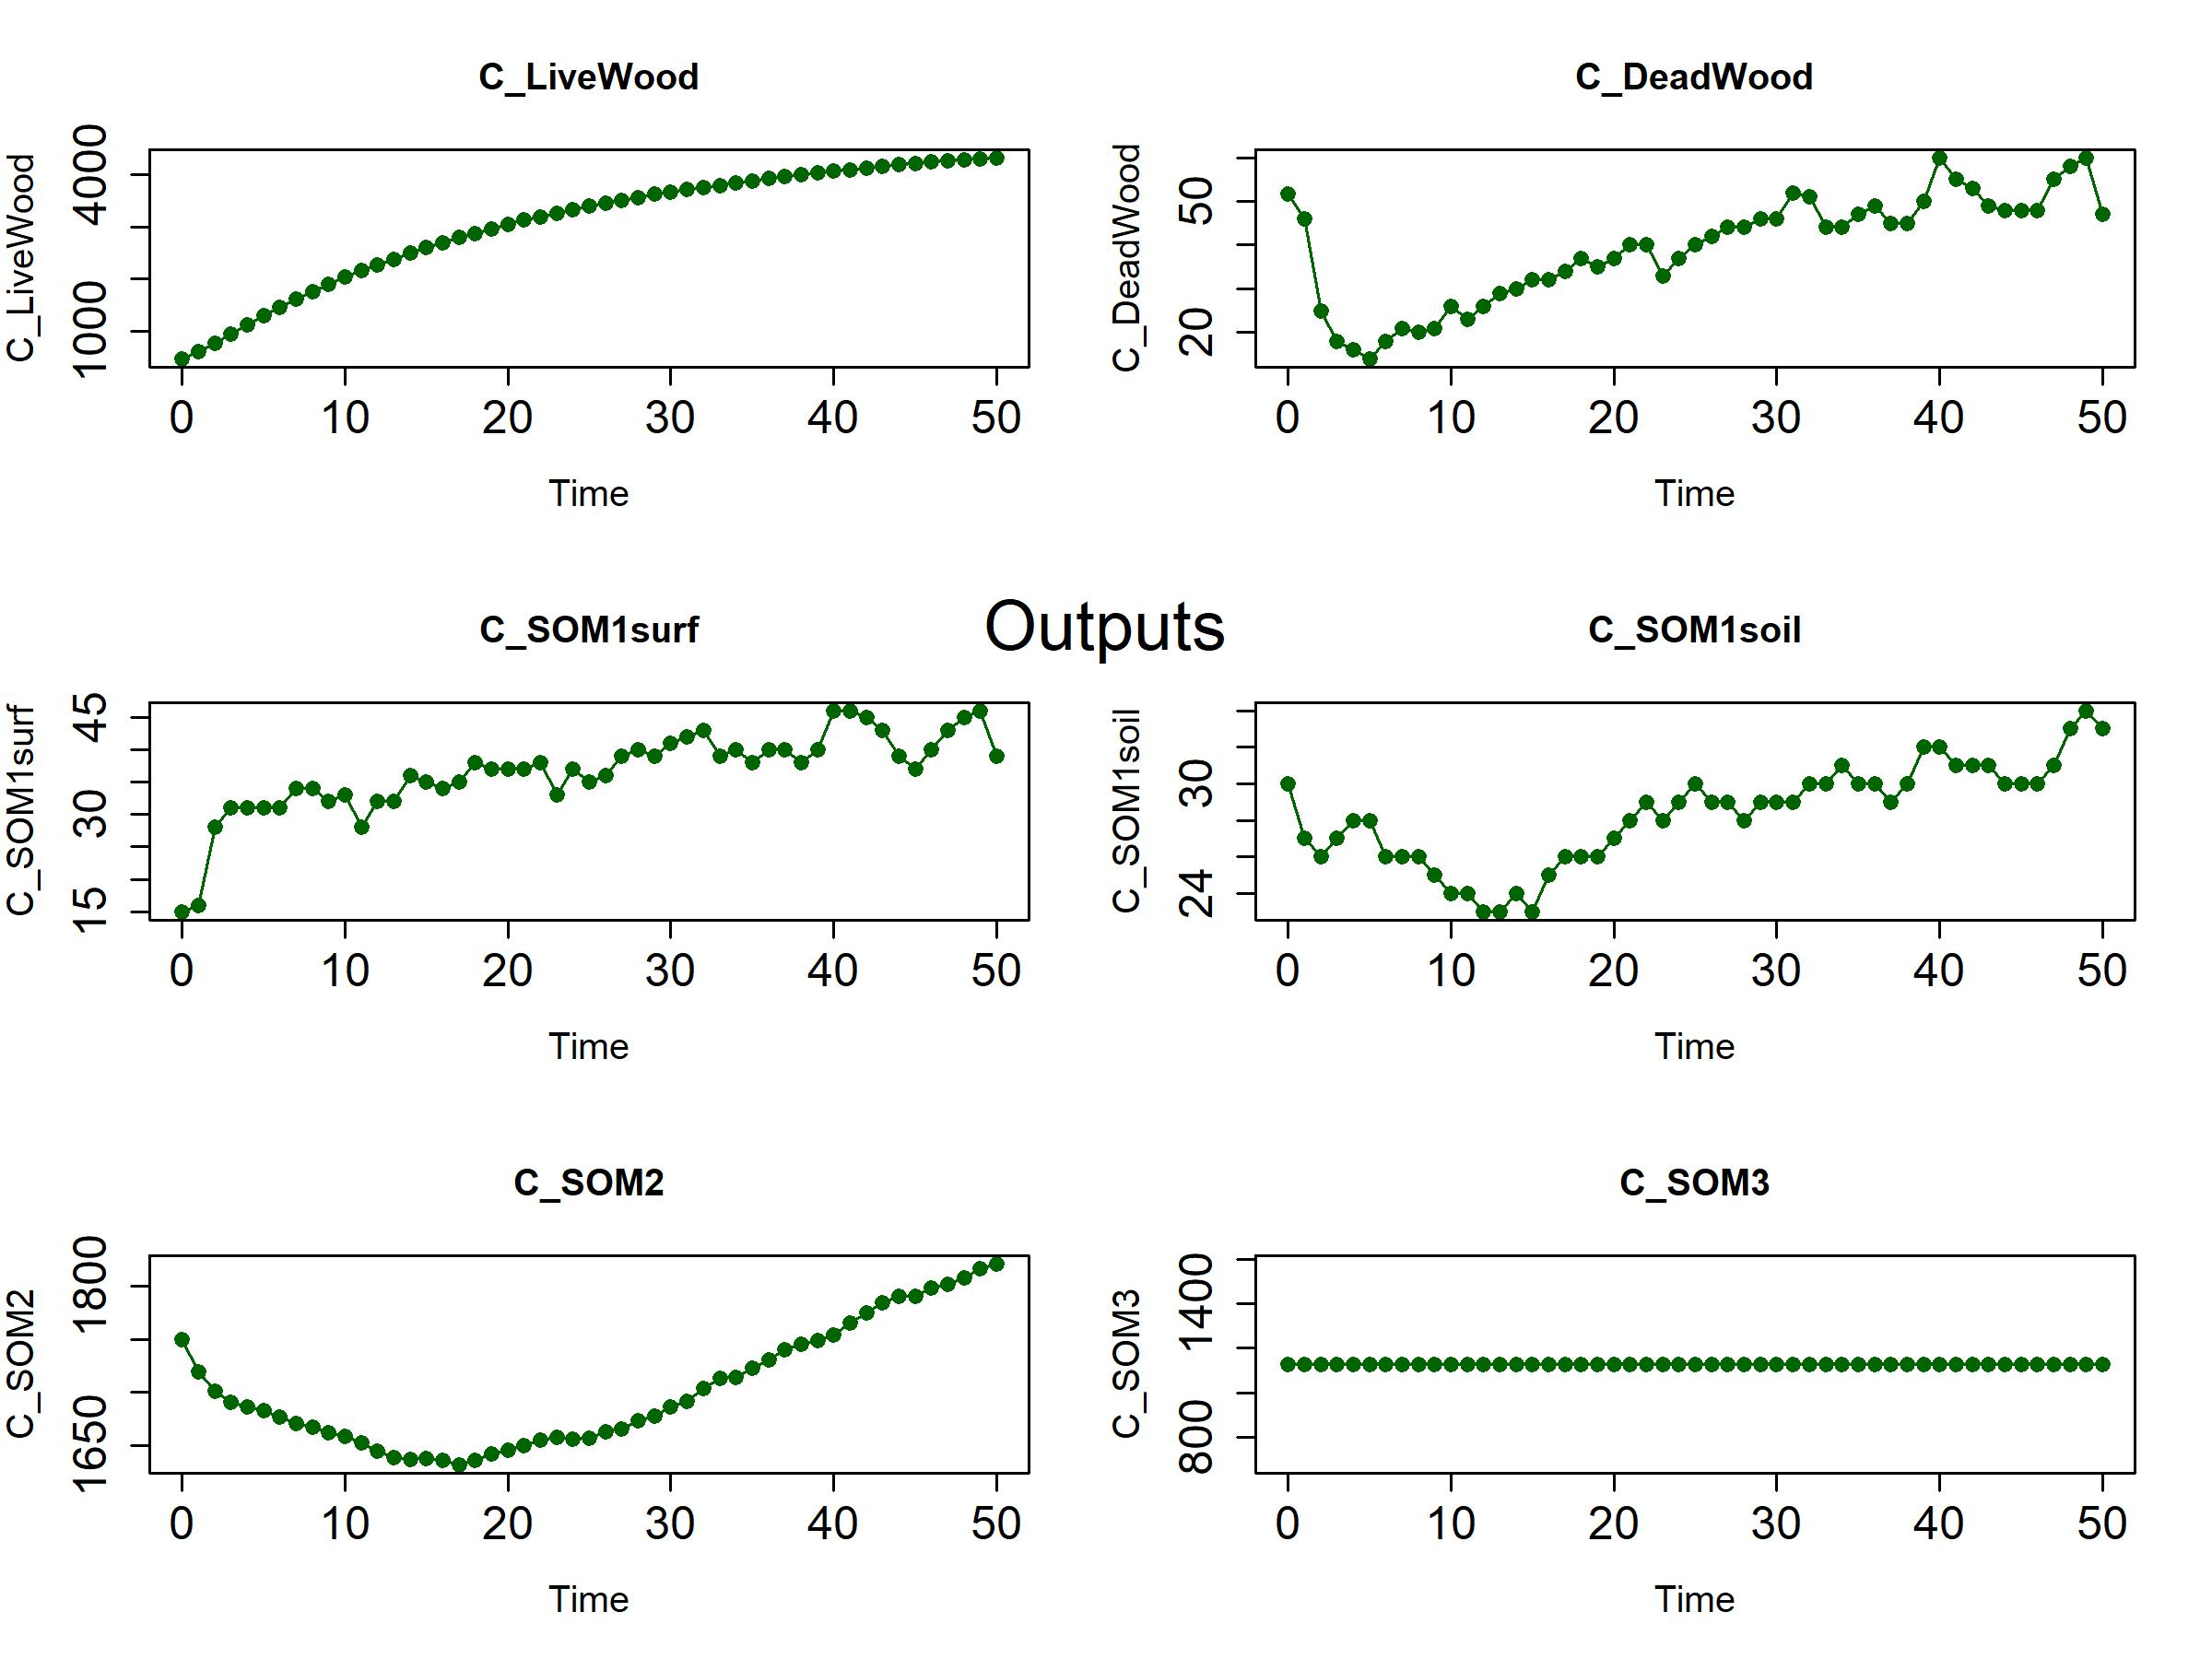

In [8]:
PATH = "E:/FS_meeting/FiguresMisc/"
Image(filename = PATH + "Carbon.jpg", width=1000, height=1000)



In [9]:
PATH = "E:/FS_meeting/FiguresMisc/"
Image(filename = PATH + "Nitrogen.jpg", width=1000, height=1000)


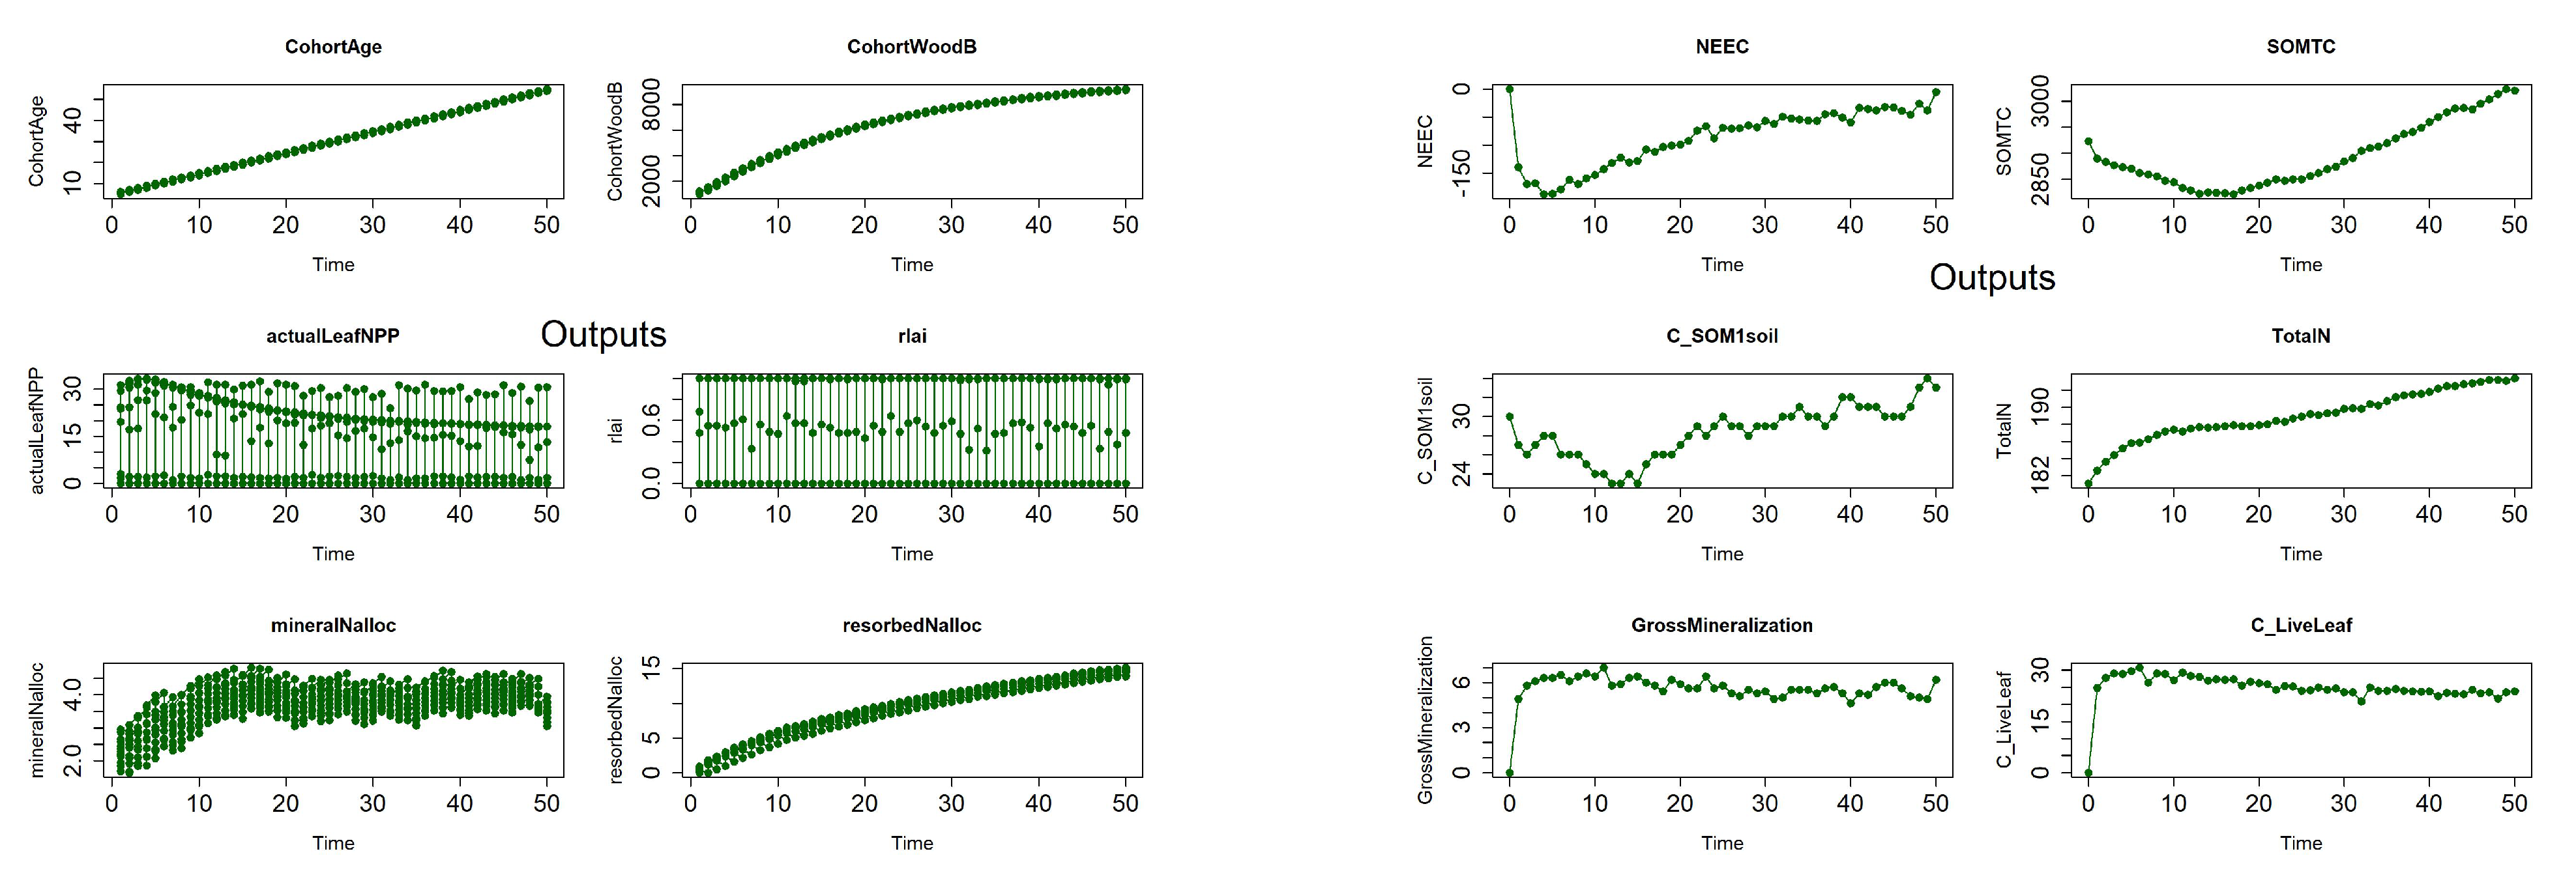

In [10]:
##Other Ecosystem stuff
mypath='E:/FS_meeting/FiguresMisc'

Growthcurveplot=["LAI.jpg","Eco.jpg"]

showImagesMatrix(Growthcurveplot, hSize = 100, wSize = 70,col=2)

In [ ]:
<h2>Functional Groups Parameterizing: Ongoing</h2>

Using the the growth curves and the values of previous landis functional groups as a estimate we will paramterize the functional groups. Here is an example of the proccesing Quercus Prinus(sp=832) in the Northern Hardwood Group. Using the minimum positive value from the growth curve and its agb value, I grow one cohort of that value with the establishment turned to zero. First we ajdust the LAI factors.

Functional Group LAI parameters:
Affect AGB considerably and need to parameterized first.
<ul>
<li>BTOLAI: Affects very little of LAI Total.</li>
<li>KLAI: Affects rate of curve.</li>
<li>MAXLAI: Affects scaler of the curve. </li>
</ul>
These are compared with functional group parameters from Hardiman et al., 2013

In [12]:
#Fix this
PATH = "C:/Users/zjrobbin/Desktop/Sapps_SC/PicsofTrees/"
Image(filename = PATH + "Oak_Hickory.png", width=500, height=500)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zjrobbin/Desktop/Sapps_SC/PicsofTrees/Oak_Hickory.png'

Citation: Hardiman, B. S., Gough, C. M., Halperin, A., Hofmeister, K. L., Nave, L. E., Bohrer, G., & Curtis, P. S. (2013). Maintaining high rates of carbon storage in old forests: a mechanism linking canopy structure to forest function. Forest Ecology and Management, 298, 111-119.
    

Once the LAI parameters are in the range of correct we can work on tuning the aboveground biomass. 


<ul>
<li>PPDF1: The minimum temperature of the range  </li>
<li>PPDF2: The maximum temperature of the range</li>
<li>PPDF3: The earlier trajectory of the curve of AGB </li>
<li>PPDF4: The later trajectory  of the curve of AGB </li>
</ul>


This is using the growth curves we put together earlier. 

Using each run and an ealier run we adjust the parameters to best match the aboveground AGB 